## Use the content

In [8]:
from idlmam import *

import torchvision
import torch
import torch.nn as nn
import torch.nn.functional as F


from torch.utils.data import Dataset, DataLoader

from tqdm.autonotebook import tqdm

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

import pandas as pd

from sklearn.metrics import accuracy_score

import time
from torchvision import transforms

In [9]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

epochs = 50
B = 256

train_data = torchvision.datasets.FashionMNIST("./data", train=True, 
transform=transforms.ToTensor(), download=True) 
test_data = torchvision.datasets.FashionMNIST("./data", train=False, 
transform=transforms.ToTensor(), download=True)

train_loader = DataLoader(train_data, batch_size=B, shuffle=True) 
test_loader = DataLoader(test_data, batch_size=B)

In [10]:
D = 28*28   
n = 128     
C = 1       
classes = 10

fc_model = nn.Sequential( 
    nn.Flatten(), 
    nn.Linear(D, n), 
    nn.Tanh(), 
    nn.Linear(n, n), 
    nn.Tanh(), 
    nn.Linear(n, n), 
    nn.Tanh(), 
    nn.Linear(n, classes), 
)

In [11]:
eta_0 = 0.1

In [12]:
loss_func = nn.CrossEntropyLoss()

fc_results = train_network(fc_model, loss_func, train_loader, test_loader=test_loader, epochs=epochs, optimizer=torch.optim.SGD(fc_model.parameters(), lr=eta_0), score_funcs={'Accuracy': accuracy_score}, device=device)

Epoch: 100%|██████████| 50/50 [15:01<00:00, 18.03s/it]


<Axes: xlabel='epoch', ylabel='test Accuracy'>

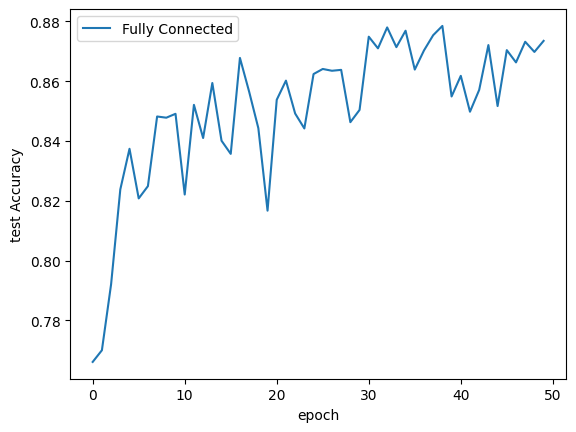

In [13]:
sns.lineplot(x='epoch', y='test Accuracy', data=fc_results, label='Fully Connected')

In [14]:
fc_model.apply(weight_reset)

eta_min = 0.0001
gamma_expo = (eta_min/eta_0)**(1/epochs)
optimizer = torch.optim.SGD(fc_model.parameters(), lr=eta_0) 
scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma_expo)

In [15]:
fc_results_expolr = train_network(fc_model, loss_func, train_loader, test_loader=test_loader, epochs=epochs, optimizer=optimizer, lr_schedule=scheduler, score_funcs={'Accuracy': accuracy_score}, device=device)

SyntaxError: invalid character '’' (U+2019) (172927321.py, line 1)

In [16]:
sns.lineplot(x='epoch', y='test Accuracy', data=fc_results_expolr, label='Fully Connected')

NameError: name 'fc_results_expolr' is not defined